In [1]:
from backtest import *

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
predictions = pd.read_csv('Predictions_test.csv')

In [4]:
# predictions['date'] = predictions['date'].apply(lambda x: datetime.datetime.strptime(str(x.date()), "%Y-%m-%d"))
predictions["date"] = pd.to_datetime(predictions["date"], format='%d/%m/%y', infer_datetime_format=True)

In [5]:
predictions

,date,Adj_Close_BTC-USD,Open_BTC-USD,High_BTC-USD,Low_BTC-USD,Sentiments,logistic_c_with_sentiment,logistic_c_without_sentiment,linear_r_with_sentiment,linear_r_without_sentiment,...,LSTM_r_without_sentiment,LSTM_r_with_sentiment,LSTM_c_without_sentiment,LSTM_c_with_sentiment,XGBoost_r_without_sentiment,XGBoost_r_with_sentiment,XGBoost_c_without_sentiment,XGBoost_c_with_sentiment,VAR_r_without_sentiment,VAR_r_with_sentiment
0,2021-03-30,58917.6914,57750.1328,59447.2227,57251.5508,negative,1,1,60725.88508,63429.57378,...,57481.590,53726.418,1,1,56996.32,57116.61,1,1,66056.07,66112.06
1,2021-03-31,58918.8320,58930.2773,59930.0273,57726.4180,positive,0,0,60015.43056,61738.72846,...,57821.902,54480.870,1,1,54857.52,54819.45,0,1,66551.48,66570.48
2,2021-04-01,59095.8086,58926.5625,59586.0703,58505.2773,negative,1,1,62418.07550,63565.46693,...,58607.530,54976.367,1,1,54857.52,54526.83,0,1,67046.78,67018.06
3,2021-04-02,59384.3125,59098.8789,60267.1875,58869.2813,negative,1,1,64821.56267,68541.81058,...,60325.640,56029.066,1,1,56996.32,57021.21,0,0,67544.10,67435.63
4,2021-04-03,57603.8906,59397.4102,60110.2695,57603.8906,positive,1,1,66061.03921,69161.68117,...,60655.990,56073.450,1,0,57195.18,57551.81,0,0,67999.63,67897.19
5,2021-04-04,58758.5547,57604.8398,58913.7461,57168.6758,negative,0,1,66487.44785,69667.33904,...,58982.324,54680.746,1,0,57195.18,57212.68,1,1,68411.97,68333.42
6,2021-04-05,59057.8789,58760.8750,59891.2969,57694.8242,positive,1,1,67067.24564,69224.64938,...,60063.234,55560.547,1,1,57175.20,57360.95,1,1,68834.53,68793.40
7,2021-04-06,58192.3594,59171.9336,59479.5781,57646.8086,positive,1,1,70473.32659,70802.96063,...,62019.098,57086.450,1,1,57175.20,57445.75,1,1,69245.81,69244.11
8,2021-04-07,56048.9375,58186.5078,58731.1445,55604.0234,negative,1,1,70557.26268,71475.28690,...,61468.355,56043.980,0,0,57278.85,57300.87,1,1,69700.58,69686.17
9,2021-04-08,58323.9531,56099.9141,58338.7383,55879.0859,negative,1,1,68267.94533,70418.46516,...,59615.496,54510.530,0,0,57195.18,57547.72,1,1,70182.59,70123.79


In [6]:
# holding period return - long only
(59893.4531 - 57750.1328)/57750.1328

0.03711368608315996

In [10]:
predictions.columns

Index(['date', 'Adj_Close_BTC-USD', 'Open_BTC-USD', 'High_BTC-USD',
       'Low_BTC-USD', 'Sentiments', 'logistic_c_with_sentiment',
       'logistic_c_without_sentiment', 'linear_r_with_sentiment',
       'linear_r_without_sentiment', 'BNN_r_without_sentiment',
       'BNN_r_with_sentiment', 'BNN_c_without_sentiment',
       'BNN_c_with_sentiment', 'LSTM_r_without_sentiment',
       'LSTM_r_with_sentiment', 'LSTM_c_without_sentiment',
       'LSTM_c_with_sentiment', 'XGBoost_r_without_sentiment',
       'XGBoost_r_with_sentiment', 'XGBoost_c_without_sentiment',
       'XGBoost_c_with_sentiment', 'VAR_r_without_sentiment',
       'VAR_r_with_sentiment'],
      dtype='object')

In [11]:
logistic_c_without_sentiment = backtest_classification_noSentiment(
                                list(predictions['logistic_c_without_sentiment']), 
                                list(predictions['date']), 
                                'logistic_c_without_sentiment')
logistic_c_with_sentiment = backtest_classification_WithSentiment(
                                list(predictions['logistic_c_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'logistic_c_with_sentiment')

linear_r_without_sentiment = backtest_regression_noSentiment(
                                list(predictions['linear_r_without_sentiment']), 
                                list(predictions['date']), 
                                'linear_r_without_sentiment')
linear_r_with_sentiment = backtest_regression_WithSentiment(
                                list(predictions['linear_r_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'linear_r_with_sentiment')

In [12]:
BNN_c_without_sentiment = backtest_classification_noSentiment(
                                list(predictions['BNN_c_without_sentiment']), 
                                list(predictions['date']), 
                                'BNN_c_without_sentiment')
BNN_c_with_sentiment = backtest_classification_WithSentiment(
                                list(predictions['BNN_c_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'BNN_c_with_sentiment')

BNN_r_without_sentiment = backtest_regression_noSentiment(
                                list(predictions['BNN_r_without_sentiment']), 
                                list(predictions['date']), 
                                'BNN_r_without_sentiment')
BNN_r_with_sentiment = backtest_regression_WithSentiment(
                                list(predictions['BNN_r_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'BNN_r_with_sentiment')

In [13]:
LSTM_c_without_sentiment = backtest_classification_noSentiment(
                                list(predictions['LSTM_c_without_sentiment']), 
                                list(predictions['date']), 
                                'LSTM_c_without_sentiment')
LSTM_c_with_sentiment = backtest_classification_WithSentiment(
                                list(predictions['LSTM_c_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'LSTM_c_with_sentiment')

LSTM_r_without_sentiment = backtest_regression_noSentiment(
                                list(predictions['LSTM_r_without_sentiment']), 
                                list(predictions['date']), 
                                'LSTM_r_without_sentiment')
LSTM_r_with_sentiment = backtest_regression_WithSentiment(
                                list(predictions['LSTM_r_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'LSTM_r_with_sentiment')

In [14]:
XGBoost_c_without_sentiment = backtest_classification_noSentiment(
                                list(predictions['XGBoost_c_without_sentiment']), 
                                list(predictions['date']), 
                                'XGBoost_c_without_sentiment')
XGBoost_c_with_sentiment = backtest_classification_WithSentiment(
                                list(predictions['XGBoost_c_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'XGBoost_c_with_sentiment')

XGBoost_r_without_sentiment = backtest_regression_noSentiment(
                                list(predictions['XGBoost_r_without_sentiment']), 
                                list(predictions['date']), 
                                'XGBoost_r_without_sentiment')
XGBoost_r_with_sentiment = backtest_regression_WithSentiment(
                                list(predictions['XGBoost_r_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'XGBoost_r_with_sentiment')

In [15]:
VAR_r_without_sentiment = backtest_regression_noSentiment(
                                list(predictions['VAR_r_without_sentiment']), 
                                list(predictions['date']), 
                                'VAR_r_without_sentiment')
VAR_r_with_sentiment = backtest_regression_WithSentiment(
                                list(predictions['VAR_r_with_sentiment']), 
                                list(predictions['date']),
                                list(predictions['Sentiments']),
                                'VAR_r_with_sentiment')

In [16]:
res = pd.DataFrame()
res["logistic_c_without_sentiment"] = logistic_c_without_sentiment
res["logistic_c_with_sentiment"] = logistic_c_with_sentiment
res["linear_r_without_sentiment"] = linear_r_without_sentiment
res["linear_r_with_sentiment"] = linear_r_with_sentiment
res["BNN_c_without_sentiment"] = BNN_c_without_sentiment
res["BNN_c_with_sentiment"] = BNN_c_with_sentiment
res["BNN_r_without_sentiment"] = BNN_r_without_sentiment
res["BNN_r_with_sentiment"] = BNN_r_with_sentiment

res["LSTM_c_without_sentiment"] = LSTM_c_without_sentiment
res["LSTM_c_with_sentiment"] = LSTM_c_with_sentiment
res["LSTM_r_without_sentiment"] = LSTM_r_without_sentiment
res["LSTM_r_with_sentiment"] = LSTM_r_with_sentiment

res["XGBoost_c_without_sentiment"] = XGBoost_c_without_sentiment
res["XGBoost_c_with_sentiment"] = XGBoost_c_with_sentiment
res["XGBoost_r_without_sentiment"] = XGBoost_r_without_sentiment
res["XGBoost_r_with_sentiment"] = XGBoost_r_with_sentiment

res["VAR_r_without_sentiment"] = VAR_r_without_sentiment
res["VAR_r_with_sentiment"] = VAR_r_with_sentiment

In [17]:
res.to_csv("backtest_results_2.csv", index = False)

In [18]:
res.columns

Index(['logistic_c_without_sentiment', 'logistic_c_with_sentiment',
       'linear_r_without_sentiment', 'linear_r_with_sentiment',
       'BNN_c_without_sentiment', 'BNN_c_with_sentiment',
       'BNN_r_without_sentiment', 'BNN_r_with_sentiment',
       'LSTM_c_without_sentiment', 'LSTM_c_with_sentiment',
       'LSTM_r_without_sentiment', 'LSTM_r_with_sentiment',
       'XGBoost_c_without_sentiment', 'XGBoost_c_with_sentiment',
       'XGBoost_r_without_sentiment', 'XGBoost_r_with_sentiment',
       'VAR_r_without_sentiment', 'VAR_r_with_sentiment'],
      dtype='object')

In [20]:
wo = [0,0.950219498,1.159997299,1.289229404,1.459474706,0.380344677,1.801124947,2.092080063,1.130604041,
      -0.360098479,1.533503164,1.486173588,2.37690597,2.457601408,2.391523557]
w = [0,0.13478279,0.128652333,0.149103663,0.129656114,-0.082771344,-0.213864122,0.006951884,-0.511195947,
     -0.073654615,-0.353594188,-0.379372172,0.441118808,0.418945691,0.32839904]

In [21]:
# wo = [1, 1.023607014,1.019893323,1.038259349,1.033369137,1.016425555,1.025999756,1.042817365,1.041759631,
#       1.04393838,1.043831557,1.041279797,1.022269873,1.029399175,1.011480113,0.996510603,1.040401463,
#       1.052493242,1.05275755,1.075909622,1.087455618,1.088469585,1.090168473,1.093040393,1.070773861,
#       1.088229754,1.09337589]

# w = [1,1.014914807,1.013237119,1.011761965, 1.008785409,0.996612084,1.007056131,1.02083223,1.020509213,
#      1.02438276,1.024324521,1.02423064,1.003930207,1.010495944,1.005810679,0.999232961,1.032698605,
#      1.03708485,1.037773614,1.048476798,1.053010352,1.053601209,1.054428183,1.054681188,1.036860035,
#      1.03980156,1.043631891]

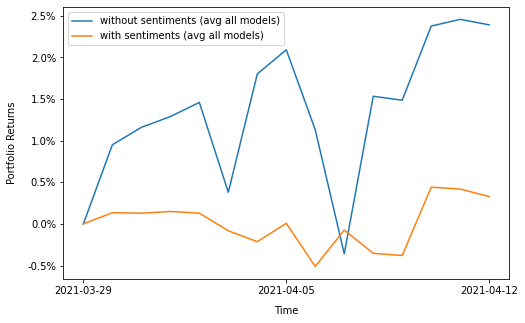

In [40]:
plt.figure(figsize = (8,5))
plt.plot([datetime.datetime(2021, 3, 29),] + predictions['date'].tolist(), wo, label = "without sentiments (avg all models)")
plt.plot([datetime.datetime(2021, 3, 29),] + predictions['date'].tolist(), w, label = "with sentiments (avg all models)")
plt.xticks(ticks = ["2021-03-29", "2021-04-05", "2021-04-12"], 
           labels = ["2021-03-29", "2021-04-05", "2021-04-12"])
plt.yticks(ticks = (-0.5,0,0.5,1,1.5,2,2.5),
           labels = ("-0.5%", "0.0%", "0.5%", "1.0%", "1.5%", "2.0%", "2.5%"))
plt.ylabel("Portfolio Returns", labelpad = 10, )
plt.xlabel("Time", labelpad = 10)
plt.legend()
plt.savefig('comparison.png')
plt.show()

In [23]:
from scipy import stats

In [24]:
stats.ttest_ind(wo, w, alternative = "greater")

Ttest_indResult(statistic=5.766023642334859, pvalue=1.720520637804596e-06)